# 9 - Ideal Waste vs. Waste considering Manufacturing and Virgin Material Losses



In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [13]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='standard', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['standard'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['standard'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

# Ideal Manufacturing Scenario
r1.createScenario(name='ideal', file=r'..\baselines\baseline_modules_World.csv')
r1.scenario['ideal'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['ideal'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

# Modify Ideal Scenario
r1.scenario['ideal'].data['mod_MFG_eff'] = 100.0
r1.scenario['ideal'].material['glass'].materialdata['mat_MFG_eff'] = 100.0
r1.scenario['ideal'].material['glass'].materialdata['mat_virgin_eff'] = 100.0
r1.scenario['ideal'].material['silicon'].materialdata['mat_MFG_eff'] = 100.0
r1.scenario['ideal'].material['silicon'].materialdata['mat_virgin_eff'] = 100.0

# Considering only waste, no circularity paths at EOL or Manufacturing.
r1.scenario['standard'].material['silicon'].materialdata['mat_MFG_scrap_Recycled'] = 0.0
r1.scenario['standard'].material['glass'].materialdata['mat_MFG_scrap_Recycled'] = 0.0
# not necessary to set mat_MFG_scrap_Recycled for ideal scenario, as the mat_MFG effis 100
r1.scenario['standard'].data['mod_EOL_collection_eff'] = 0.0
r1.scenario['ideal'].data['mod_EOL_collection_eff'] = 0.0


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [14]:
IRENA= True
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta': 30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta': 30}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  ideal
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


In [15]:
r1.scenario['standard'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_NotRecycled', 'mat_modules_NotCollected',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_EnteringModuleManufacturing', 'mat_LostinModuleManufacturing',
       'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_Recycled_Successfully',
       'mat_MFG_Scrap_Recycled_Lo

In [16]:
r1.scenario['standard'].data.iloc[-1]

year                                                                   2050
new_Installed_Capacity_[MW]                                          152663
mod_eff                                                             25.0725
mod_reliability_t50                                                      40
mod_reliability_t90                                                      44
mod_degradation                                                         0.5
mod_lifetime                                                             35
mod_MFG_eff                                                              90
mod_EOL_collection_eff                                                    0
mod_EOL_collected_recycled                                               40
mod_Repowering                                                            0
mod_Repairing                                                             0
Area                                                            6.08885e+08
Cumulative_A

In [17]:
r1.scenario['standard'].material['glass'].materialdata.iloc[-1]

year                                         2.050000e+03
mat_virgin_eff                               9.990000e+01
mat_massperm2                                9.159875e+03
mat_MFG_eff                                  8.300000e+01
mat_MFG_scrap_Recycled                       0.000000e+00
mat_MFG_scrap_Recycling_eff                  5.000000e+01
mat_MFG_scrap_Recycled_into_HQ               2.000000e+01
mat_MFG_scrap_Recycled_into_HQ_Reused4MFG    1.000000e+01
mat_EOL_collected_Recycled                   9.000000e+01
mat_EOL_Recycling_eff                        4.000000e+01
mat_EOL_Recycled_into_HQ                     1.500000e+01
mat_EOL_RecycledHQ_Reused4MFG                8.000000e+00
mat_modules_NotRecycled                      0.000000e+00
mat_modules_NotCollected                     9.904409e+11
mat_EOL_sento_Recycling                      0.000000e+00
mat_EOL_NotRecycled_Landfilled               0.000000e+00
mat_EOL_Recycled                             0.000000e+00
mat_EOL_Recycl

In [18]:
r1.scenario['standard'].material['glass'].materialdata.tail()

,year,mat_virgin_eff,mat_massperm2,mat_MFG_eff,mat_MFG_scrap_Recycled,mat_MFG_scrap_Recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_EOL_collected_Recycled,mat_EOL_Recycling_eff,...,mat_MFG_Recycled_into_HQ,mat_MFG_Recycled_into_OQ,mat_MFG_Recycled_HQ_into_MFG,mat_MFG_Recycled_HQ_into_OU,mat_Virgin_Stock,mat_Virgin_Stock_Raw,mat_Total_EOL_Landfilled,mat_Total_MFG_Landfilled,mat_Total_Landfilled,mat_Total_Recycled_OU
51,2046,99.9,9159.875,83.0,0.0,50.0,20.0,10.0,90.0,40.0,...,0.0,0.0,0.0,0.0,5.363618e+12,5.368987e+12,6.983224e+11,1.356995e+12,2.055318e+12,0.0
52,2047,99.9,9159.875,83.0,0.0,50.0,20.0,10.0,90.0,40.0,...,0.0,0.0,0.0,0.0,5.825219e+12,5.831050e+12,7.724125e+11,1.473780e+12,2.246193e+12,0.0
53,2048,99.9,9159.875,83.0,0.0,50.0,20.0,10.0,90.0,40.0,...,0.0,0.0,0.0,0.0,6.327125e+12,6.333459e+12,8.438849e+11,1.600763e+12,2.444647e+12,0.0
54,2049,99.9,9159.875,83.0,0.0,50.0,20.0,10.0,90.0,40.0,...,0.0,0.0,0.0,0.0,6.872865e+12,6.879744e+12,9.154969e+11,1.738835e+12,2.654332e+12,0.0
55,2050,99.9,9159.875,83.0,0.0,50.0,20.0,10.0,90.0,40.0,...,0.0,0.0,0.0,0.0,7.466275e+12,7.473748e+12,9.904409e+11,1.888968e+12,2.879408e+12,0.0


In [19]:
cumWaste_ideal_glass = r1.scenario['ideal'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste_ideal_glass = cumWaste_ideal_glass/1000000  # Converting to tonnes

cumWaste_ideal_Si = r1.scenario['ideal'].material['silicon'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste_ideal_Si = cumWaste_ideal_Si/1000000  # Converting to tonnes

cumWaste_std_glass = r1.scenario['standard'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste_std_glass = cumWaste_std_glass/1000000  # Converting to tonnes

cumWaste_std_Si = r1.scenario['standard'].material['silicon'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste_std_Si = cumWaste_std_Si/1000000  # Converting to tonnes


Text(0.5, 1.0, 'Silicon')

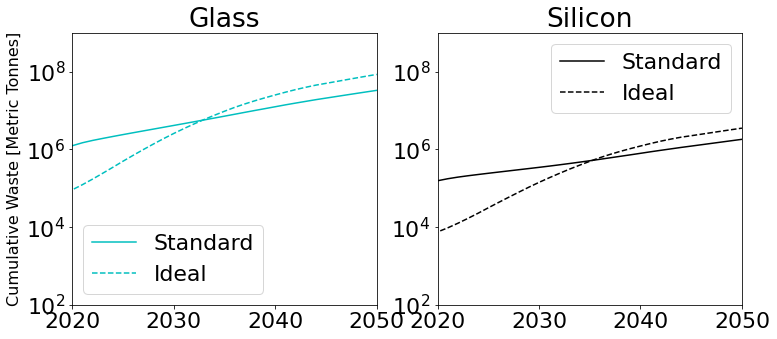

In [20]:
x = r1.scenario['standard'].data['year']

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Cumulative Waste', y = 0.02)

ax1.plot(x,cumWaste_std_glass, 'c',  label='Standard')
ax1.plot(x,cumWaste_ideal_glass, 'c--', label='Ideal')
ax1.set_yscale('log')
ax1.legend()
ax1.set_xlim([2020, 2050])
ax1.set_ylim([1e2, 1e9])
ax1.set_ylabel('Cumulative Waste [Metric Tonnes]', fontsize=16)
ax1.set_title('Glass')

ax2.plot(x,cumWaste_std_Si, color='k',  label='Standard')
ax2.plot(x,cumWaste_ideal_Si, 'k--', label='Ideal')
ax2.set_yscale('log')
ax2.legend()
ax2.set_xlim([2020, 2050])
ax2.set_ylim([1e2, 1e9])
ax2.set_title('Silicon')

